# Challenge: If a tree falls in the forest...

Now that you've learned about random forests and decision trees let's do an exercise in accuracy. You know that random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

Build the best decision tree you can. 

Hopefully out of this you'll see the power of random forests, but also their potential costs. Remember, in the real world you won't necessarily be dealing with thousands of rows. It could be millions, billions, or even more.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

import time
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

df = pd.read_csv('./data/abalone.csv', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
print(df.Sex.unique())

df = df[df['Sex'] != 'I']
print(df.Sex.unique())

['M' 'F' 'I']
['M' 'F']


## Building a Decision Tree

In [7]:
start_time = time.time()

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
my_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
decision_tree.fit(df[my_columns].values, df['Sex'].values)

print(cross_val_score(decision_tree, df[my_columns].values, df['Sex'].values, cv=5))
print("--- %s seconds ---" % (time.time() - start_time))

[ 0.58098592  0.50704225  0.52910053  0.53533569  0.55123675]
--- 0.05294013023376465 seconds ---


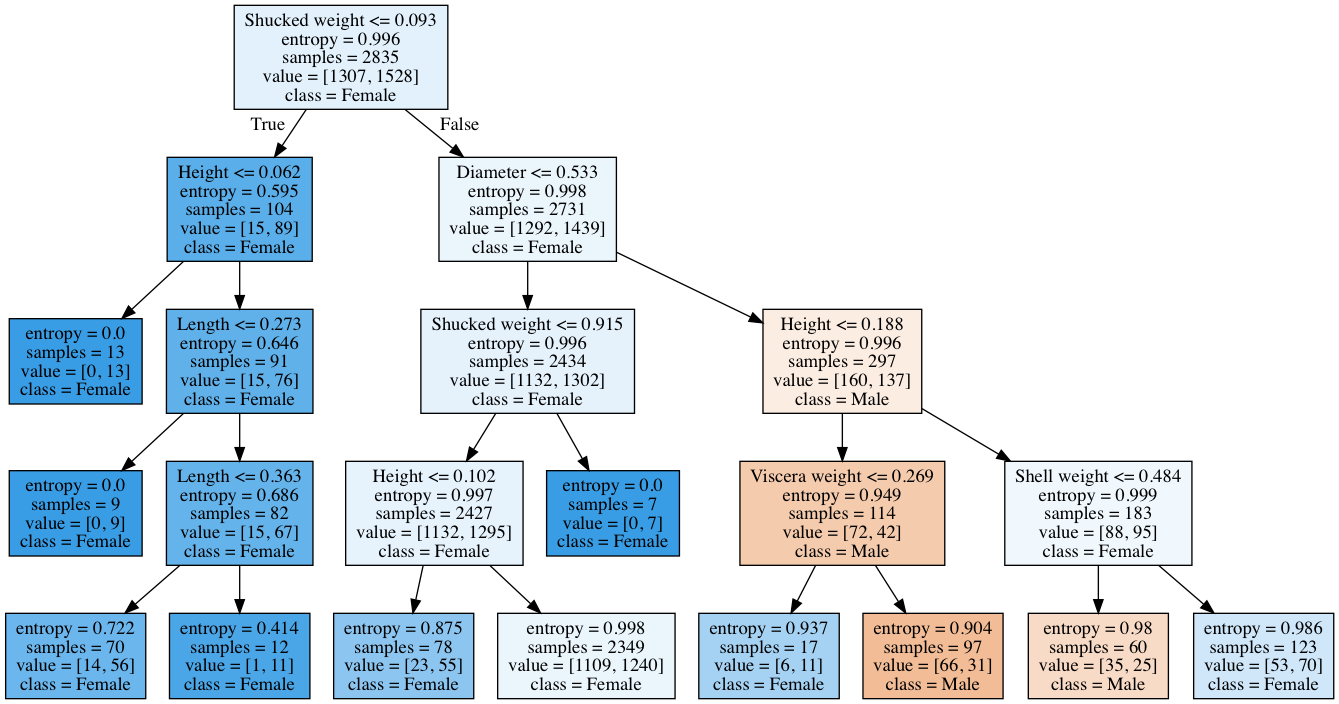

In [4]:
abalone_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=my_columns,
    class_names=['Male', 'Female'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(abalone_data)
Image(graph.create_png())

## Building a Random Forest

I will try to match the decision tree with the simplest random forest I can. For my purposes, I will measure simplicity with runtime. Compare that to the runtime of the decision tree (this is imperfect).

In [8]:
start_time = time.time()

rfc = ensemble.RandomForestClassifier()
X = df.drop('Sex', 1)
Y = df['Sex']

print(cross_val_score(rfc, X, Y, cv=5))
print("--- %s seconds ---" % (time.time() - start_time))

[ 0.52112676  0.49295775  0.51146384  0.49823322  0.55477032]
--- 0.3373758792877197 seconds ---


## Evaluating Models

The random forest had a significantly slower runtime than that of the decision tree (roughly 0.31 seconds, vs. the decision tree's 0.0084 seconds). I am also disappointed to see that both models are about equally accurate, with the decision tree being slightly more accurate (51-58% for decision tree, 49-55% for random forest).

This exemplifies random forests' potential drawbacks – they are more complex, and thus slower, than decision trees, and not always more accurate.